## ***(x,y) Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Ïù¥Ï∞®Î∞©Ï†ïÏãùÏùò Í≥ÑÏàò Ï∂îÏ†ïÌïòÍ∏∞***

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step


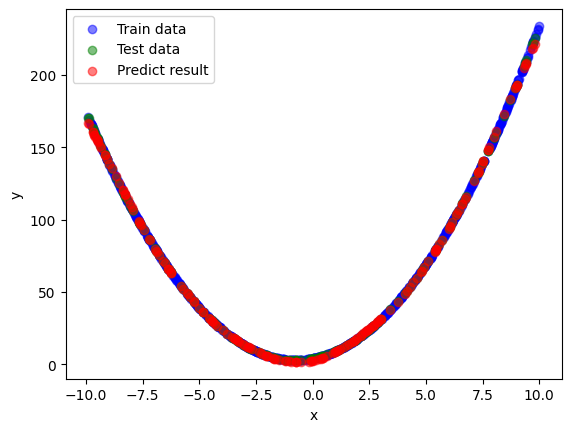

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Ïù¥ Î∂ÄÎ∂ÑÏùÑ 10, 100, 1000 ÏúºÎ°ú Ï°∞Ï†ïÌïòÎ©¥ÏÑú ÌÖåÏä§Ìä∏
data_size = 1000

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±: y = 2x^2 + 3x + 4
np.random.seed(42)
x = np.random.uniform(-10, 10, data_size).reshape(-1, 1)
y = 2 * x**2 + 3 * x + 4  # yÎäî 2x^2 + 3x + 4Ïùò ÌòïÌÉúÎ°ú ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú Î∂ÑÎ¶¨
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Îî•Îü¨Îãù Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=500, verbose=0)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
y_pred_test = model.predict(x_test)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂Ñ)
plt.scatter(x_train, y_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(x_test, y_test, color='Green', label='Test data', alpha=0.5)
plt.scatter(x_test, y_pred_test, color='Red', label='Predict result', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## ***Tokenizer Îã§Ïö¥Î°úÎìú***

In [1]:
from transformers import PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",bos_token='</s>', eos_token='</s>', unk_token='<unk>',pad_token='<pad>', mask_token='<mask>')
tokenizer.save_pretrained("./my_tokenizer")

c:\Users\minsul\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\minsul\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\minsul\.cache\huggingface\hub\models--skt--kogpt2-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this

## ***TokenizerÎ•º Ïù¥Ïö©Ìï¥ Î¨∏Ïû•ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞***

In [2]:
# ÏûÖÎ†• Î¨∏Ïû•
text = "ÏÇ∞Ï±ÖÏùÑ ÎÇòÍ∞ÄÎ≥ºÍπåÏöî?"

# ÌÜ†ÌÅ∞Ìôî Î∞è ID Î≥ÄÌôò
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(tokens)
print(token_ids)

['‚ñÅÏÇ∞', 'Ï±ÖÏùÑ', '‚ñÅÎÇòÍ∞Ä', 'Î≥º', 'Íπå', 'Ïöî', '?']
[9145, 12115, 12312, 7656, 6969, 8084, 406]


## ***vocab Îì§Ïó¨Îã§Î≥¥Í∏∞: TokenizerÍ∞Ä Î¨∏Ïû•ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî Ï≤¥Í≥Ñ***

In [3]:
import json

with open('./my_tokenizer/tokenizer.json', 'r') as f:
    j = json.load(f)

j

{'version': '1.0',
 'truncation': None,
 'padding': None,
 'added_tokens': [{'id': 0,
   'content': '<s>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 1,
   'content': '</s>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 2,
   'content': '<usr>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 3,
   'content': '<pad>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 4,
   'content': '<sys>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 5,
   'content': '<unk>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False,
   'special': True},
  {'id': 6,
   'content': '<mask>',
   'single_word': False